In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('diamonds.csv')

In [59]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


<AxesSubplot:xlabel='carat', ylabel='price'>

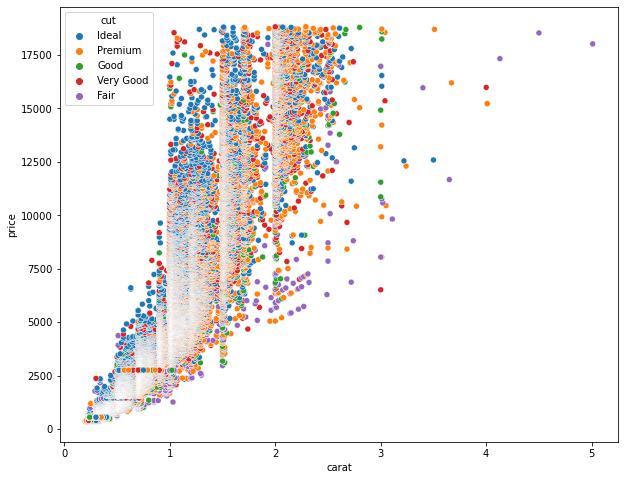

In [61]:
plt.figure(figsize = (10,8))
sns.scatterplot(x='carat', y = 'price', data = df, hue  = 'cut')

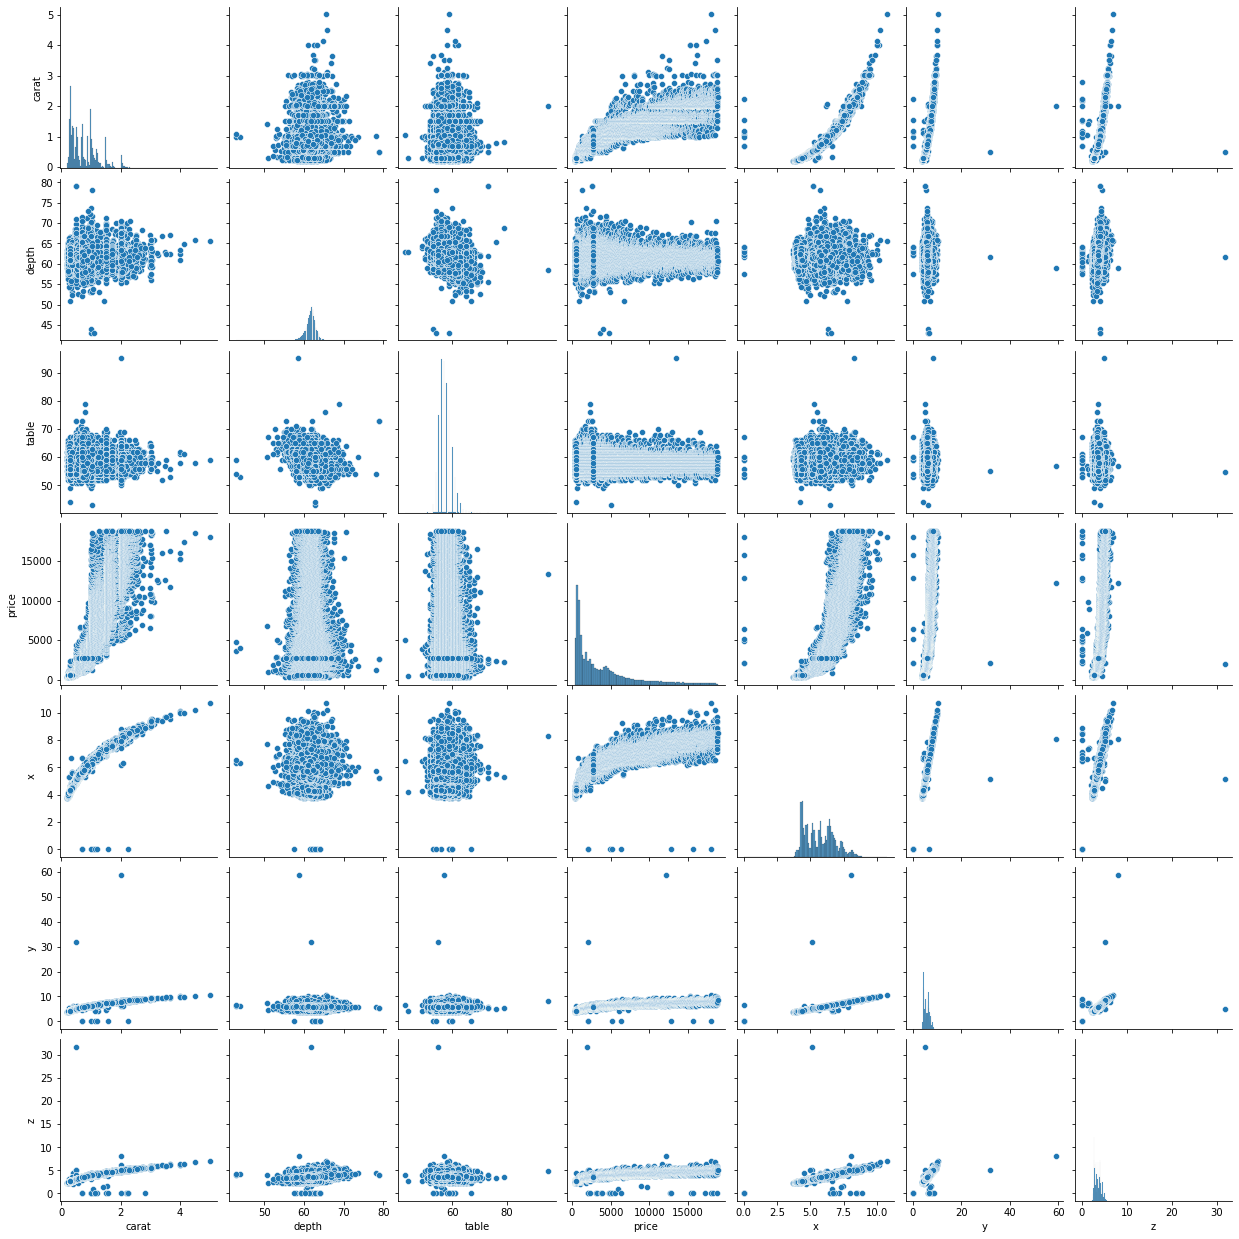

In [62]:
sns.pairplot(df)

<AxesSubplot:xlabel='price'>

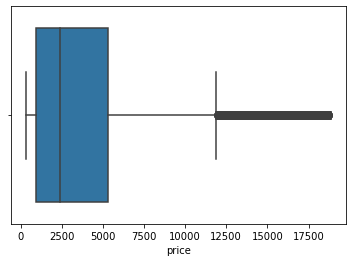

In [63]:
sns.boxplot(x = 'price', data = df, hue = 'cut')

<AxesSubplot:xlabel='carat'>

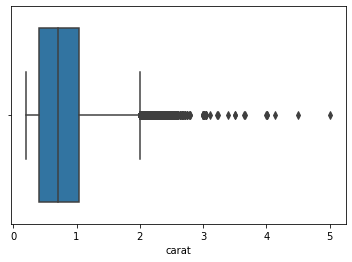

In [64]:
sns.boxplot(x = 'carat', data = df)

In [65]:
df.describe(include ='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [66]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [67]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [68]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [69]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [70]:
inputs = df[['carat','cut','color','clarity','depth','table','x','y','z']]

In [71]:
target = df['price']

In [72]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.25, random_state=42)

In [115]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40455, 9)
(13485, 9)
(40455,)
(13485,)


In [116]:
X_train.reset_index(drop= True, inplace = True)
X_train

,carat,cut,color,clarity,depth,table,x,y,z
0,0.25,Good,E,VVS2,64.9,58.0,3.95,3.97,2.57
1,0.84,Ideal,J,SI1,61.8,56.0,6.04,6.07,3.74
2,1.05,Premium,J,VS2,61.1,58.0,6.56,6.51,3.99
3,1.02,Ideal,F,SI2,60.7,56.0,6.53,6.50,3.95
4,0.61,Ideal,F,VS1,61.8,57.0,5.43,5.47,3.37
...,...,...,...,...,...,...,...,...,...
40450,1.05,Very Good,I,VS2,62.4,59.0,6.48,6.51,4.05
40451,0.47,Ideal,D,VS1,61.0,55.0,5.03,5.01,3.06
40452,0.33,Very Good,F,IF,60.3,58.0,4.49,4.46,2.70
40453,0.90,Premium,J,SI1,62.8,59.0,6.13,6.03,3.82


In [117]:
X_test.reset_index(drop= True, inplace = True)
X_test

,carat,cut,color,clarity,depth,table,x,y,z
0,0.24,Ideal,G,VVS1,62.1,56.0,3.97,4.00,2.47
1,0.58,Very Good,F,VVS2,60.0,57.0,5.44,5.42,3.26
2,0.40,Ideal,E,VVS2,62.1,55.0,4.76,4.74,2.95
3,0.43,Premium,E,VVS2,60.8,57.0,4.92,4.89,2.98
4,1.55,Ideal,E,SI2,62.3,55.0,7.44,7.37,4.61
...,...,...,...,...,...,...,...,...,...
13480,0.56,Very Good,J,SI1,60.3,59.0,5.30,5.34,3.21
13481,1.63,Good,F,SI1,59.8,56.0,7.57,7.64,4.55
13482,1.21,Ideal,E,VS2,62.4,54.0,6.86,6.80,4.26
13483,1.01,Premium,F,SI2,62.2,59.0,6.41,6.45,4.00


In [118]:
y_train.reset_index(drop= True,inplace = True)
y_train

0         476
1        2493
2        4145
3        4541
4        2283
         ... 
40450    4975
40451    1617
40452    1014
40453    2871
40454    6320
Name: price, Length: 40455, dtype: int64

In [119]:
y_test.reset_index(drop= True, inplace =True)
y_test

0          559
1         2201
2         1238
3         1304
4         6901
         ...  
13480      957
13481    13187
13482     9215
13483     4416
13484     3564
Name: price, Length: 13485, dtype: int64

In [120]:
X_train_num  = X_train.select_dtypes(include='number')
X_train_num.reset_index(drop= True,inplace = True)
X_train_num

,carat,depth,table,x,y,z
0,0.25,64.9,58.0,3.95,3.97,2.57
1,0.84,61.8,56.0,6.04,6.07,3.74
2,1.05,61.1,58.0,6.56,6.51,3.99
3,1.02,60.7,56.0,6.53,6.50,3.95
4,0.61,61.8,57.0,5.43,5.47,3.37
...,...,...,...,...,...,...
40450,1.05,62.4,59.0,6.48,6.51,4.05
40451,0.47,61.0,55.0,5.03,5.01,3.06
40452,0.33,60.3,58.0,4.49,4.46,2.70
40453,0.90,62.8,59.0,6.13,6.03,3.82


In [121]:
X_train_cat = X_train.select_dtypes(include='object')
X_train_cat.reset_index(drop = True,inplace = True)
X_train_cat

,cut,color,clarity
0,Good,E,VVS2
1,Ideal,J,SI1
2,Premium,J,VS2
3,Ideal,F,SI2
4,Ideal,F,VS1
...,...,...,...
40450,Very Good,I,VS2
40451,Ideal,D,VS1
40452,Very Good,F,IF
40453,Premium,J,SI1


In [122]:
X_test_num  = X_test.select_dtypes(include='number')
X_test_num.reset_index(drop = True,inplace = True)
X_test_num

,carat,depth,table,x,y,z
0,0.24,62.1,56.0,3.97,4.00,2.47
1,0.58,60.0,57.0,5.44,5.42,3.26
2,0.40,62.1,55.0,4.76,4.74,2.95
3,0.43,60.8,57.0,4.92,4.89,2.98
4,1.55,62.3,55.0,7.44,7.37,4.61
...,...,...,...,...,...,...
13480,0.56,60.3,59.0,5.30,5.34,3.21
13481,1.63,59.8,56.0,7.57,7.64,4.55
13482,1.21,62.4,54.0,6.86,6.80,4.26
13483,1.01,62.2,59.0,6.41,6.45,4.00


In [123]:
X_test_cat = X_test.select_dtypes(include='object')
X_test_cat.reset_index(drop = True,inplace = True)
X_test_cat

,cut,color,clarity
0,Ideal,G,VVS1
1,Very Good,F,VVS2
2,Ideal,E,VVS2
3,Premium,E,VVS2
4,Ideal,E,SI2
...,...,...,...
13480,Very Good,J,SI1
13481,Good,F,SI1
13482,Ideal,E,VS2
13483,Premium,F,SI2


In [124]:
encode_cut = {'Fair':1, 'Good':2, 'Very Good':3, 'Ideal':4, 'Premium':5 }

In [125]:
X_train_cat['cut'] = X_train_cat['cut'].apply(lambda x: encode_cut[x])

<ipython-input-125-c98831c1f9cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat['cut'] = X_train_cat['cut'].apply(lambda x: encode_cut[x])


In [126]:
X_test_cat['cut'] = X_test_cat['cut'].apply(lambda x: encode_cut[x])

<ipython-input-126-e7f2e28e3d63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat['cut'] = X_test_cat['cut'].apply(lambda x: encode_cut[x])


In [127]:
encode_color = {'J':1,'I':2,'H':3,'G':4,'F':5,'E':4,'D':5}

In [128]:
X_train_cat['color'] = X_train_cat['color'].apply(lambda x: encode_color[x])

<ipython-input-128-69f1cbcf2fb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat['color'] = X_train_cat['color'].apply(lambda x: encode_color[x])


In [129]:
X_test_cat['color'] = X_test_cat['color'].apply(lambda x: encode_color[x])

<ipython-input-129-bceaadc1ae6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat['color'] = X_test_cat['color'].apply(lambda x: encode_color[x])


In [130]:
encode_clarity = {'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}

In [131]:
X_train_cat.clarity = X_train_cat.clarity.apply(lambda x:encode_clarity[x])

C:\Users\kisho\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [132]:
X_test_cat.clarity = X_test_cat.clarity.apply(lambda x:encode_clarity[x])

In [137]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [138]:
X_train_num = pd.DataFrame(scaler.fit_transform(X_train_num),columns = X_train_num.columns)
X_test_num = pd.DataFrame(scaler.transform(X_test_num), columns = X_test_num.columns)

In [139]:
X_train = pd.concat([X_train_num,X_train_cat],axis =1)
X_test= pd.concat([X_test_num,X_test_cat], axis =1)

In [ ]:
# def knn_regressor(k, X_train, X_test, y_train):
#     y_pred =[]
#     for i in range(len(X_test)):
#         distances = []
#         for j in range(len(X_train)):
#             distances.append(math.sqrt((X_test.iloc[i]['carat'] - X_train.iloc[j]['carat'])**2 + 
#                             (X_test.iloc[i]['depth'] - X_train.iloc[j]['depth'])**2 +
#                              (X_test.iloc[i]['table'] - X_train.iloc[j]['table'])**2 +
#                              (X_test.iloc[i]['x'] - X_train.iloc[j]['x'])**2 +
#                              (X_test.iloc[i]['y'] - X_train.iloc[j]['y'])**2 +
#                              (X_test.iloc[i]['z'] - X_train.iloc[j]['z'])**2 +
#                              (X_test.iloc[i]['cut'] - X_train.iloc[j]['cut'])**2 +
#                              (X_test.iloc[i]['cut'] - X_train.iloc[j]['cut'])**2 +
#                              (X_test.iloc[i]['color'] - X_train.iloc[j]['color'])**2 +
#                              (X_test.iloc[i]['clarity'] - X_train.iloc[j]['clarity'])**2 ))
#         distances = pd.Series(distances)
#         X_train['distances']= distances
#         X_train['price'] = y_train
#         X_train = X_train.sort_values(by = 'distances', ascending = True)
#         k_neighbours = X_train.iloc[:k]
#         y_test_pred = k_neighbours['price'].mean()
#         y_pred.append(y_test_pred)
#         X_train = X_train.drop('price',axis = 1)
#     y_pred = np.array(y_pred)
#     return(y_pred)
        

In [150]:
y_test

0          559
1         2201
2         1238
3         1304
4         6901
         ...  
13480      957
13481    13187
13482     9215
13483     4416
13484     3564
Name: price, Length: 13485, dtype: int64

In [183]:
def knn_reg(X_train, X_test,y_train,k):
    y_pred = []
    for i in range(len(X_test)):
        diff = X_test.values[i] - X_train.values
        sq_dif = np.square(diff)
        dist = np.sum(sq_dif,axis =1)
        dist = np.sqrt(dist)
        dist_d = {'distance':dist}
        dist_df = pd.DataFrame(dist_d)
        X_train_d = pd.merge(X_train, dist_df,left_index = True, right_index = True)
        X_train_d = pd.merge(X_train_d, y_train,left_index = True, right_index = True)
        X_train_d = X_train_d.sort_values(by='distance')
        X_train_k = X_train_d[:k]
        y_pred.append(X_train_k['price'].mean())
    return(y_pred)

In [154]:
k = 7

In [156]:
%%time
y_predicted = knn_reg(X_train,X_test,y_train,k)

Wall time: 3min 39s


In [157]:
y_predicted = np.array(y_predicted)

In [158]:
comparison_df = pd.DataFrame({"Actual":y_test.values,'Predicted':y_predicted})

In [159]:
comparison_df

,Actual,Predicted
0,559,614.142857
1,2201,2570.285714
2,1238,1083.714286
3,1304,1540.714286
4,6901,9161.142857
...,...,...
13480,957,1346.428571
13481,13187,12786.285714
13482,9215,7984.428571
13483,4416,4606.285714


In [160]:
from sklearn import metrics

In [161]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_predicted))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_predicted))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_predicted)))

Mean Absolute Error:  406.17561311510144
Mean Squared Error:  583031.9842803418
Root Mean Squared Error:  763.565311077148


In [162]:
from sklearn.neighbors import KNeighborsRegressor

In [180]:
%%time
regres_knn = KNeighborsRegressor(n_neighbors=7)
regres_knn.fit(X_train,y_train)
y_test_pred = regres_knn.predict(X_test)

Wall time: 656 ms


In [176]:
compar_df_2 = pd.DataFrame({'Actual':y_test, "Predicted":y_test_pred})

In [177]:
compar_df_2

,Actual,Predicted
0,559,614.142857
1,2201,2570.285714
2,1238,1083.714286
3,1304,1540.714286
4,6901,9161.142857
...,...,...
13480,957,1346.428571
13481,13187,12786.285714
13482,9215,7984.428571
13483,4416,4606.285714


In [181]:
#For Code imported from SKLearn
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_test_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_test_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

Mean Absolute Error:  406.17481858149273
Mean Squared Error:  582999.964792324
Root Mean Squared Error:  763.5443436974201


In [182]:
#For Code Built from Scratch
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_predicted))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_predicted))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_predicted)))

Mean Absolute Error:  406.17561311510144
Mean Squared Error:  583031.9842803418
Root Mean Squared Error:  763.565311077148
